# Dataset

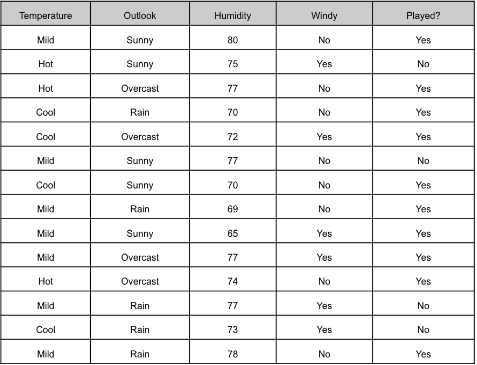

# Library and Weather Data

In [18]:
from scipy.stats import entropy
from collections import Counter 


# Data that is being used for decision tree construction 
weather_data = { 
                 'Temperature': ['Mild',   'Hot',    'Hot',    'Cool',   'Cool',   'Mild',  'Cool',  'Mild', 'Mild',   'Mild',     'Hot',     'Mild', 'Cool', 'Mild'],
                 'Outlook':     ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain', 'Rain', 'Rain'],
                 'Humidity':    [  80,      75,      77,         70,       72,       77,      70,     69,      65,       77,         74,        77,     73,     78  ],
                 'Windy':       [ 'No',    'Yes', '  No',       'No',     'Yes',    'No',    'No',   'No',    'Yes',    'Yes',      'No',      'Yes',  'Yes',  'No' ],
                 'Played?':     [ 'Yes',    'No',   'Yes',      'Yes',    'Yes',    'No',    'Yes',  'Yes',   'Yes',    'Yes',      'Yes',      'No',   'No',  'Yes']
               }

# Calculate Entropy

In [19]:
def CalculateEntropy(wd, attr, feat):

    yes_count = 0
    no_count = 0
    
    feat_count = Counter(wd.get(attr, [])).get(feat, 0)

    # Determines the indices for the given feature. Tallies 'Yes' and 'No' in 'Played?'
    indices = [index for index, value in enumerate(wd[attr]) if value == feat]
    for i in indices:
        if wd['Played?'][i] == 'Yes':
            yes_count += 1
        else:
            no_count += 1
            
    return (feat_count / len(wd[attr])) * entropy([yes_count / feat_count, no_count / feat_count], base = 2)

# Information Gain

In [20]:
def InformationGain(wd, pred, attr, feat):
    
    # Calculate the predicting Entropy. Starts with 'Played?' at root, but quickly becomes others
    size = len(wd[pred])
    yes_count = Counter(wd.get(pred, [])).get('Yes', 0)
    no_count = Counter(wd.get(pred, [])).get('No', 0)
    PlayedEntropy = entropy([yes_count / size, no_count / size], base = 2)

    # Get the sum of Feature Entropies for a given Attribute
    featE = 0
    for i in feat:
        featE += CalculateEntropy(wd, attr, i)

    # Return Information Gain
    return PlayedEntropy - featE

# Decision Selection

In [21]:
def NodeSelect(wd, attr):
    node_iter = 0
    
    # Calculate Information Gains to determine given Node
    IG = []
    for i in range(0, len(attr)):
        IG.append(InformationGain(wd, 'Played?', attr[i], list(set(wd.get(attr[i], [])))))
        print(f'Information Gain of {attr[i]} is: {round(IG[i], 6)} bits')

    # Based on what the Maximum IG is, indicate the winning node
    for i in range(0, len(attr)):
        if (max(IG) == IG[i]):
            # Determine it's respective values
            print(f'Attribute with highest gain is {attr[i]}')
            print(f'This is Node {node_iter} in the decision tree')
            sub_features = list(set(wd.get(attr[1], [])))
            for j in range(0, len(sub_features)):
                NodeSelect(wd, sub_features[j])
                
            # Need to do some preparatiton stuff before calling NodeSelect
            # Want to reduce the size of weather_data. delete some stuff!

# Main: Construct the Decision Tree

In [22]:
attributes = ['Temperature', 'Outlook', 'Humidity', 'Windy']
NodeSelect(weather_data, attributes)
        

Information Gain of Temperature is: 0.002989 bits
Information Gain of Outlook is: 0.169584 bits
Information Gain of Humidity is: 0.577406 bits
Information Gain of Windy is: 0.138713 bits
Attribute with highest gain is Humidity
This is Node 0 in the decision tree
Information Gain of O is: 0.863121 bits
Information Gain of v is: 0.863121 bits
Information Gain of e is: 0.863121 bits
Information Gain of r is: 0.863121 bits
Information Gain of c is: 0.863121 bits
Information Gain of a is: 0.863121 bits
Information Gain of s is: 0.863121 bits
Information Gain of t is: 0.863121 bits
Attribute with highest gain is O
This is Node 0 in the decision tree
Attribute with highest gain is v
This is Node 0 in the decision tree
Attribute with highest gain is e
This is Node 0 in the decision tree
Attribute with highest gain is r
This is Node 0 in the decision tree
Attribute with highest gain is c
This is Node 0 in the decision tree
Attribute with highest gain is a
This is Node 0 in the decision tree
Att